In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv('./drive/MyDrive/Colab Notebooks/Divvy_Trips_2017_Q1.csv')
df2 = pd.read_csv('./drive/MyDrive/Colab Notebooks/Divvy_Trips_2017_Q2.csv')

df1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0


In [3]:
print(df1.shape)
print(df2.shape)

(431691, 12)
(1119814, 12)


In [4]:
df = pd.concat([df1, df2])

df.shape

(1551505, 12)

In [5]:
df.head(10)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0
5,13518900,3/31/2017 23:51:17,3/31/2017 23:55:19,3536,242,143,Sedgwick St & Webster Ave,289,Wells St & Concord Ln,Subscriber,Male,1988.0
6,13518899,3/31/2017 23:51:16,3/31/2017 23:57:17,5111,361,81,Daley Center Plaza,41,Federal St & Polk St,Subscriber,Male,1987.0
7,13518898,3/31/2017 23:50:26,3/31/2017 23:56:20,1579,354,56,Desplaines St & Kinzie St,77,Clinton St & Madison St,Subscriber,Male,1981.0
8,13518897,3/31/2017 23:50:25,3/31/2017 23:55:24,3914,299,210,Ashland Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1992.0
9,13518896,3/31/2017 23:49:58,4/1/2017 00:09:31,5455,1173,117,Wilton Ave & Belmont Ave,29,Noble St & Milwaukee Ave,Subscriber,Male,1989.0


In [6]:
df.isnull().sum()

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               316867
birthyear            316683
dtype: int64

In [7]:
df.dropna(subset=['gender', 'birthyear'], inplace=True)

df.isnull().sum()

trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
dtype: int64

In [8]:
df.shape

(1234638, 12)

In [9]:
duplicates = df.duplicated().sum()

duplicates

0

In [10]:
df.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration           int64
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

In [11]:
df

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1119809,13518910,4/1/2017 00:06:30,4/1/2017 00:11:56,1796,326,296,Broadway & Belmont Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1960.0
1119810,13518909,4/1/2017 00:06:00,4/1/2017 00:20:53,22,893,199,Wabash Ave & Grand Ave,68,Clinton St & Tilden St,Subscriber,Male,1979.0
1119811,13518908,4/1/2017 00:04:13,4/1/2017 00:19:20,1296,907,56,Desplaines St & Kinzie St,69,Damen Ave & Pierce Ave,Subscriber,Male,1993.0
1119812,13518907,4/1/2017 00:03:08,4/1/2017 00:08:24,2695,316,332,Halsted St & Diversey Pkwy,226,Racine Ave & Belmont Ave,Subscriber,Male,1986.0


In [27]:
df_new = df[['tripduration', 'from_station_name', 'to_station_name','usertype', 'gender', 'birthyear']]

df_new

,tripduration,from_station_name,to_station_name,usertype,gender,birthyear
0,857,Clinton St & Lake St,May St & Cullerton St,Subscriber,Male,1989.0
1,236,Wabash Ave & Grand Ave,McClurg Ct & Illinois St,Subscriber,Male,1990.0
2,348,Greenview Ave & Jarvis Ave,Clark St & Lunt Ave,Subscriber,Female,1979.0
3,288,Dearborn St & Erie St,McClurg Ct & Erie St,Subscriber,Male,1985.0
4,415,Sheffield Ave & Webster Ave,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0
...,...,...,...,...,...,...
1119809,326,Broadway & Belmont Ave,Pine Grove Ave & Waveland Ave,Subscriber,Male,1960.0
1119810,893,Wabash Ave & Grand Ave,Clinton St & Tilden St,Subscriber,Male,1979.0
1119811,907,Desplaines St & Kinzie St,Damen Ave & Pierce Ave,Subscriber,Male,1993.0
1119812,316,Halsted St & Diversey Pkwy,Racine Ave & Belmont Ave,Subscriber,Male,1986.0


In [13]:
df_new['usertype'].value_counts()

Subscriber    1234155
Customer          479
Dependent           4
Name: usertype, dtype: int64

In [14]:
a = df_new[df_new['usertype'] == 'Subscriber']['tripduration'].mean()
print('Subscriber :', a)
b = df_new[df_new['usertype'] == 'Customer']['tripduration'].mean()
print('Customer :', b)
c = df_new[df_new['usertype'] == 'Dependent']['tripduration'].mean()
print('Dependent :', c)

Subscriber : 699.7651137823045
Customer : 865.0187891440501
Dependent : 454.25


Text(0, 0.5, 'Average Using Time')

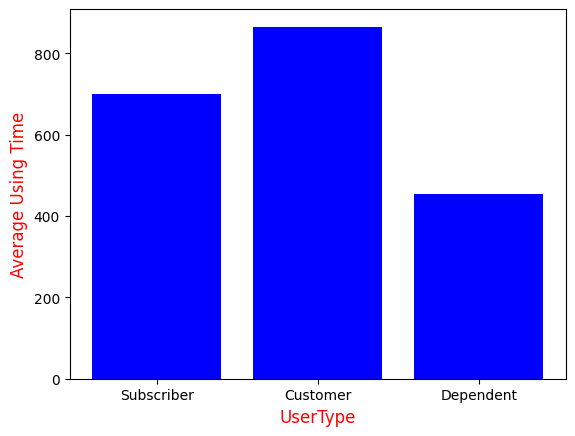

In [15]:
plt.bar(['Subscriber', 'Customer', 'Dependent'], [a, b, c], color = 'blue')
plt.xlabel('UserType', fontsize = 'large', color='red')
plt.ylabel('Average Using Time', fontsize= 'large', color='red')

In [16]:
df_new['usertype'].describe()

count        1234638
unique             3
top       Subscriber
freq         1234155
Name: usertype, dtype: object

In [17]:
user_type = df_new['usertype'].value_counts().rename_axis('usertype').reset_index(name='counts')
user_type

,usertype,counts
0,Subscriber,1234155
1,Customer,479
2,Dependent,4


In [18]:
# subsciber is the people who need to commute between home and office daily.
# customer is the people who need the bike ride occasionally. The group of people have multiple choices of transporttation.
# dependent is the people who need bike ride for emergency.

perc_user = user_type['counts'].values / user_type['counts'].sum()
user = user_type['usertype'].values

perc_user

array([9.99608792e-01, 3.87967971e-04, 3.23981604e-06])

In [19]:
df_new

,tripduration,from_station_name,to_station_name,usertype,gender,birthyear
0,857,Clinton St & Lake St,May St & Cullerton St,Subscriber,Male,1989.0
1,236,Wabash Ave & Grand Ave,McClurg Ct & Illinois St,Subscriber,Male,1990.0
2,348,Greenview Ave & Jarvis Ave,Clark St & Lunt Ave,Subscriber,Female,1979.0
3,288,Dearborn St & Erie St,McClurg Ct & Erie St,Subscriber,Male,1985.0
4,415,Sheffield Ave & Webster Ave,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0
...,...,...,...,...,...,...
1119809,326,Broadway & Belmont Ave,Pine Grove Ave & Waveland Ave,Subscriber,Male,1960.0
1119810,893,Wabash Ave & Grand Ave,Clinton St & Tilden St,Subscriber,Male,1979.0
1119811,907,Desplaines St & Kinzie St,Damen Ave & Pierce Ave,Subscriber,Male,1993.0
1119812,316,Halsted St & Diversey Pkwy,Racine Ave & Belmont Ave,Subscriber,Male,1986.0


In [20]:
gender = df_new['gender'].value_counts().rename_axis('gender').reset_index(name='counts')
male_count = gender[gender['gender']=='Male'].counts
female_count = gender[gender['gender']=='Female'].counts

print('Male users: ', int(male_count))
print('Female users: ', int(female_count))

Male users:  935854
Female users:  298784


([<matplotlib.patches.Wedge at 0x7db91511d270>,
 [Text(-0.8333478753853484, 0.7924842702481396, 'Male'),
  Text(0.7971153590642461, -0.7580284324112639, 'Female')],
 [Text(-0.47102271217432723, 0.44792589187938314, '75.8%'),
  Text(0.4347901958532251, -0.41347005404250753, '24.2%')])

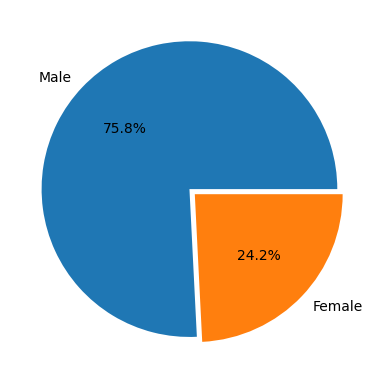

In [21]:
gender_label = ['Male', 'Female']
myexplode = [0.05, 0.0]
plt.pie([int(male_count), int(female_count)], labels= gender_label, autopct = "%.1f%%", explode = myexplode)

In [22]:
age = abs(df_new['birthyear'] - 2017)
age

0          28.0
1          27.0
2          38.0
3          32.0
4          28.0
           ... 
1119809    57.0
1119810    38.0
1119811    24.0
1119812    31.0
1119813    30.0
Name: birthyear, Length: 1234638, dtype: float64

In [23]:
# age 16 or older
print('youngest: ',age.min())
print('oldest: ', age.max())

youngest:  1.0
oldest:  118.0


In [28]:
df.drop(df_new[df_new['birthyear'] > 2001].index, inplace=True)
df.drop(df_new[df_new['birthyear'] < 1937].index, inplace=True)
df_new



,tripduration,from_station_name,to_station_name,usertype,gender,birthyear
0,857,Clinton St & Lake St,May St & Cullerton St,Subscriber,Male,1989.0
1,236,Wabash Ave & Grand Ave,McClurg Ct & Illinois St,Subscriber,Male,1990.0
2,348,Greenview Ave & Jarvis Ave,Clark St & Lunt Ave,Subscriber,Female,1979.0
3,288,Dearborn St & Erie St,McClurg Ct & Erie St,Subscriber,Male,1985.0
4,415,Sheffield Ave & Webster Ave,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0
...,...,...,...,...,...,...
1119809,326,Broadway & Belmont Ave,Pine Grove Ave & Waveland Ave,Subscriber,Male,1960.0
1119810,893,Wabash Ave & Grand Ave,Clinton St & Tilden St,Subscriber,Male,1979.0
1119811,907,Desplaines St & Kinzie St,Damen Ave & Pierce Ave,Subscriber,Male,1993.0
1119812,316,Halsted St & Diversey Pkwy,Racine Ave & Belmont Ave,Subscriber,Male,1986.0


In [29]:
age = abs(df_new['birthyear'] - 2017)
print('youngest: ',age.min())
print('oldest: ', age.max())

youngest:  16.0
oldest:  79.0


(array([150588., 588277., 246745., 155149.,  79725.,  12408.]),
 array([16., 26., 36., 46., 56., 66., 76.]),
 <BarContainer object of 6 artists>)

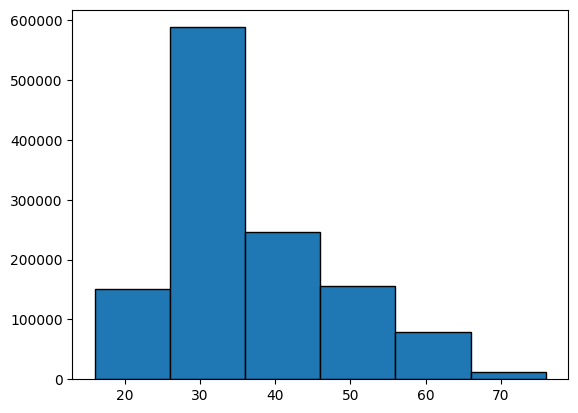

In [30]:
plt.hist(age, bins = range(16,80,10), edgecolor = 'black')

In [31]:
df_new['age'] = age

<ipython-input-31-0ddc9d968f71>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['age'] = age


In [32]:
df_new

,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,age
0,857,Clinton St & Lake St,May St & Cullerton St,Subscriber,Male,1989.0,28.0
1,236,Wabash Ave & Grand Ave,McClurg Ct & Illinois St,Subscriber,Male,1990.0,27.0
2,348,Greenview Ave & Jarvis Ave,Clark St & Lunt Ave,Subscriber,Female,1979.0,38.0
3,288,Dearborn St & Erie St,McClurg Ct & Erie St,Subscriber,Male,1985.0,32.0
4,415,Sheffield Ave & Webster Ave,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,28.0
...,...,...,...,...,...,...,...
1119809,326,Broadway & Belmont Ave,Pine Grove Ave & Waveland Ave,Subscriber,Male,1960.0,57.0
1119810,893,Wabash Ave & Grand Ave,Clinton St & Tilden St,Subscriber,Male,1979.0,38.0
1119811,907,Desplaines St & Kinzie St,Damen Ave & Pierce Ave,Subscriber,Male,1993.0,24.0
1119812,316,Halsted St & Diversey Pkwy,Racine Ave & Belmont Ave,Subscriber,Male,1986.0,31.0


In [33]:
df_new[df_new['gender'] == 'Male'].tripduration
df_new[df_new['gender'] == 'Male'].age

0          28.0
1          27.0
3          32.0
5          29.0
6          30.0
           ... 
1119809    57.0
1119810    38.0
1119811    24.0
1119812    31.0
1119813    30.0
Name: age, Length: 934616, dtype: float64

In [34]:
df_new['tripduration'].describe()

count    1.233263e+06
mean     6.996881e+02
std      1.028652e+03
min      6.000000e+01
25%      3.500000e+02
50%      5.650000e+02
75%      8.980000e+02
max      8.609600e+04
Name: tripduration, dtype: float64

In [35]:
df_new['tripduration'].mode()

0    332
Name: tripduration, dtype: int64

Text(0.5, 1.0, 'Relationship between Age & Trip Duration')

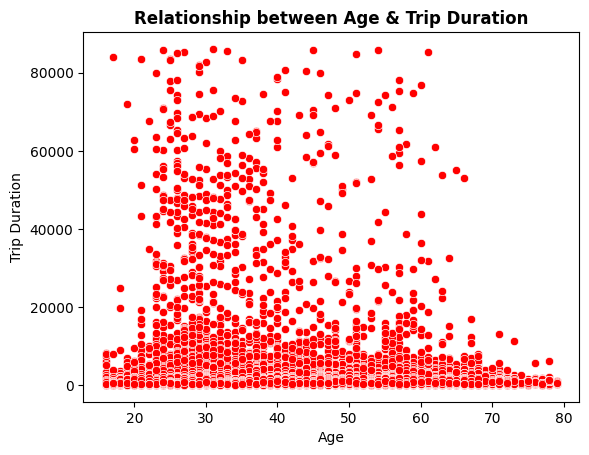

In [36]:
g = sns.scatterplot(data= df_new, x='age', y='tripduration', color='red')
g.set_xlabel('Age')
g.set_ylabel('Trip Duration')
g.set_title('Relationship between Age & Trip Duration', fontweight='bold')

Text(0.5, 0.98, 'Relationship between Age and TripDuration Seperated by Gender ')

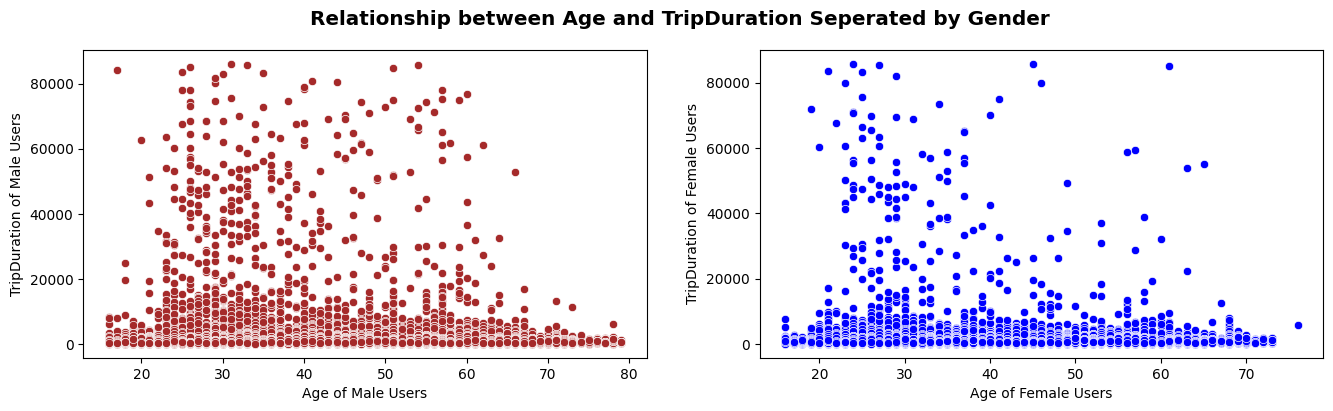

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))

sns.scatterplot(ax=ax[0] ,data= df_new[df_new['gender']=='Male'], x='age', y='tripduration', color='brown')
ax[0].set_xlabel('Age of Male Users')
ax[0].set_ylabel('TripDuration of Male Users')

sns.scatterplot(ax=ax[1] ,data= df_new[df_new['gender']=='Female'], x='age', y='tripduration', color='blue')
ax[1].set_xlabel('Age of Female Users')
ax[1].set_ylabel('TripDuration of Female Users')

fig.suptitle('Relationship between Age and TripDuration Seperated by Gender ', fontweight='heavy', size='x-large')



In [39]:
df_new[df_new['gender']=='Male'].tripduration.describe()

count    934616.000000
mean        672.859198
std         988.949393
min          60.000000
25%         338.000000
50%         541.000000
75%         861.000000
max       86096.000000
Name: tripduration, dtype: float64

In [40]:
df_new[df_new['gender']=='Male'].tripduration.mode()

0    332
Name: tripduration, dtype: int64

In [43]:
df_new[df_new['gender']=='Female'].tripduration.describe()

count    298647.000000
mean        783.649010
std        1139.962619
min          60.000000
25%         399.000000
50%         648.000000
75%        1010.000000
max       85782.000000
Name: tripduration, dtype: float64

In [44]:
df_new[df_new['gender']=='Female'].tripduration.mode()

0    342
Name: tripduration, dtype: int64

In [45]:
df_new

,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,age
0,857,Clinton St & Lake St,May St & Cullerton St,Subscriber,Male,1989.0,28.0
1,236,Wabash Ave & Grand Ave,McClurg Ct & Illinois St,Subscriber,Male,1990.0,27.0
2,348,Greenview Ave & Jarvis Ave,Clark St & Lunt Ave,Subscriber,Female,1979.0,38.0
3,288,Dearborn St & Erie St,McClurg Ct & Erie St,Subscriber,Male,1985.0,32.0
4,415,Sheffield Ave & Webster Ave,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,28.0
...,...,...,...,...,...,...,...
1119809,326,Broadway & Belmont Ave,Pine Grove Ave & Waveland Ave,Subscriber,Male,1960.0,57.0
1119810,893,Wabash Ave & Grand Ave,Clinton St & Tilden St,Subscriber,Male,1979.0,38.0
1119811,907,Desplaines St & Kinzie St,Damen Ave & Pierce Ave,Subscriber,Male,1993.0,24.0
1119812,316,Halsted St & Diversey Pkwy,Racine Ave & Belmont Ave,Subscriber,Male,1986.0,31.0


In [48]:
df_new['from_station_name'].describe()

count                          1233263
unique                             577
top       Clinton St & Washington Blvd
freq                             21752
Name: from_station_name, dtype: object

In [51]:
df_new['to_station_name'].describe()

count                          1233263
unique                             577
top       Clinton St & Washington Blvd
freq                             20532
Name: to_station_name, dtype: object

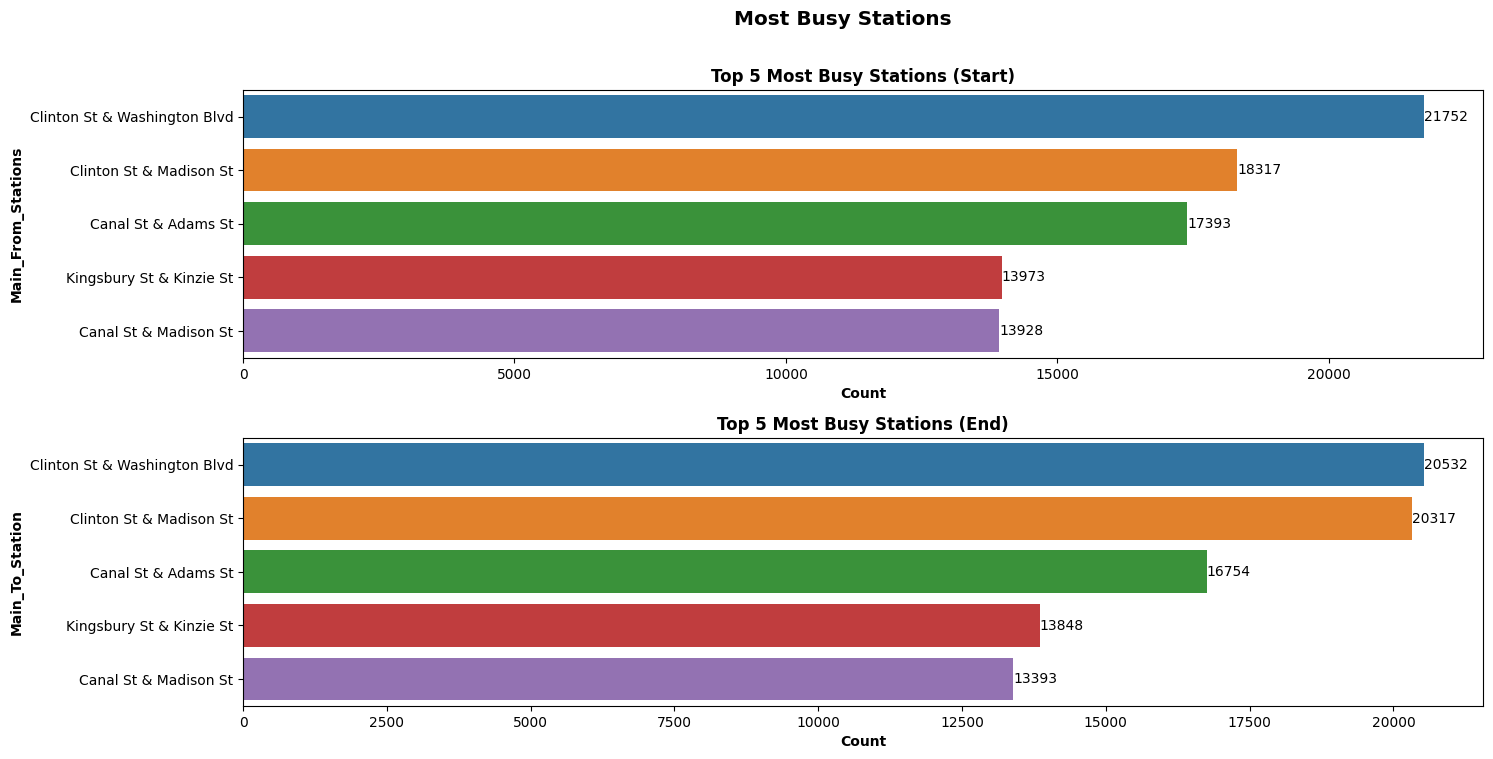

In [50]:
most_from_stations = df_new['from_station_name'].value_counts().head(5).rename_axis('from_station_name').reset_index(name='counts')
most_to_stations = df_new['to_station_name'].value_counts().head(5).rename_axis('to_station_name').reset_index(name='counts')

fig, ax = plt.subplots(2, 1, figsize=(16, 8))
fig.suptitle('Most Busy Stations', fontweight='heavy', size='x-large')

sns.barplot(ax=ax[0], data=most_from_stations, x='counts', y='from_station_name')
ax[0].set_xlabel('Count', fontweight='bold')
ax[0].set_ylabel('Main_From_Stations', fontweight='bold')
ax[0].set_title('Top 5 Most Busy Stations (Start)', fontweight='bold')
ax[0].bar_label(ax[0].containers[0])


sns.barplot(ax=ax[1], data=most_to_stations, x='counts', y='to_station_name')
ax[1].set_xlabel('Count', fontweight='bold')
ax[1].set_ylabel('Main_To_Station', fontweight='bold')
ax[1].set_title('Top 5 Most Busy Stations (End)', fontweight='bold')
ax[1].bar_label(ax[1].containers[0])

plt.subplots_adjust(hspace = 0.3)